Copyright (c) 2019 OERCompBiomed

# Unsupervised classification - multispectral brain MRI segmentation

## What is K-means?

Illustrative example adapted from: http://www.bigendiandata.com/2017-04-18-Jupyter_Customer360/ (Ian Downard)

[K-means clustering](https://en.wikipedia.org/wiki/Cluster_analysis) aims to group a set of **_objects_** with attributes (**_features_**) in such a way that objects in the same group (or cluster) are more **_similar_** to each other with respect to their attribute values than to objects in other groups. It operates on a table where every entry is an attribute value of a given object. <br>K-means only supports numeric attributes (columns). In python such table is often represented as a Pandas dataframe. A dataframe with two columns can easily be visualized as a scatterplot, where the x-axis is the first column (or attribute) and the y-axis is the second column. 

**For example, here’s a 2 dimensional scatterplot for a dataframe with two columns**

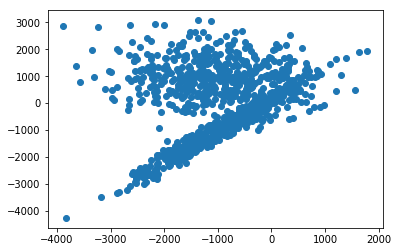

In [1]:
from IPython.display import Image
Image(filename='./assets/scatter-2d.png', width=500)

**If you were to manually group the data in the above graph, how would you do it?**<br>
    You might draw two circles, like this:

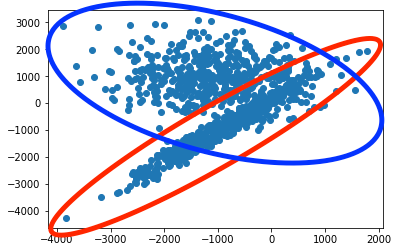

In [2]:
Image(filename='./assets/scatter-2d-circled.png', width=500)

**And in this case the grouping is pretty close to what you get through K-means -** <br>

where the following figure shows how the data is segmented by running K-means on our two dimensional dataset.**

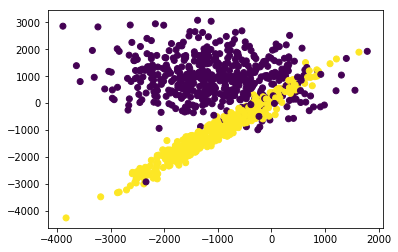

In [3]:
Image(filename='./assets/scatter-2d-segments.png', width=500)

### A real K-means example using synthetic data

(modified from the "Python Data Science Handbook" by Jake VanderPlas)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)

# Fit the K Means model
model = KMeans(4, random_state=0)
y = model.fit_predict(X)

In [5]:
centroids = model.cluster_centers_

**Plot the input data (without cluster labels)**

In [6]:
# Make a function for common plot formatting
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='black')
    ax.set_ylabel('feature 2', color='black')
    ax.set_title(title, color='black')

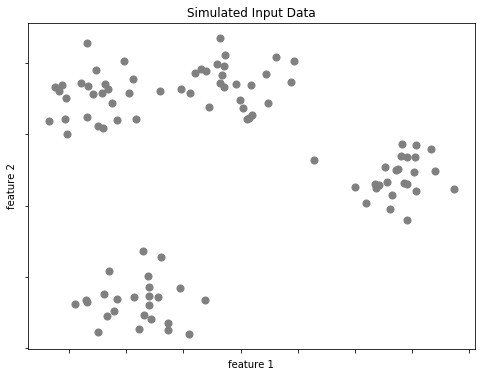

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

# format the plot
format_plot(ax, 'Simulated Input Data')

plt.show()
# fig.savefig('assets/k-means-clustering-1.png')

**Plot the data with color-coded cluster labels and star-shaped cluster centroids**

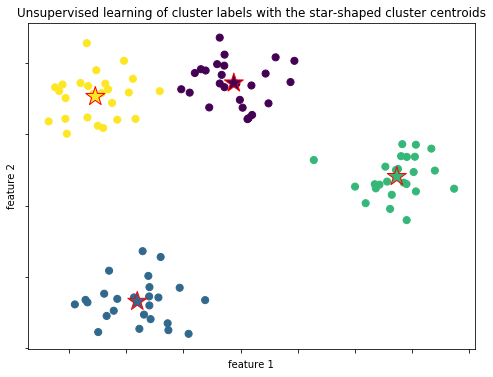

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=400, c=range(4), cmap='viridis', edgecolors = 'red')

# format the plot
format_plot(ax, 'Unsupervised learning of cluster labels with the star-shaped cluster centroids')

plt.show()
# fig.savefig('assets/k-means-clustering-2.png')

### Visualizing K-means clusters in 3D using the interactive tool  [`plotly`](https://github.com/plotly/plotly.py)
Plotly is an interactive, open-source, and browser-based graphing library for Python

The above plots were created by clustering two attribute columns, only. There could have been other columns in our data set, but we just used two columns. If we want to use an additional column as a clustering feature we would want to visualize the cluster over three dimensions. <br>Here is an example that shows how to visualize cluster shapes with a 3D scatter/mesh plot in a Jupyter notebook using [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) to generate data and plotly for visualization.

In [9]:
# Initialize plotting library and functions for 3D scatter plots 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
#from sklearn.externals import six
import six
import pandas as pd
import numpy as np
import argparse
import json
import re
import os
import sys
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

def rename_columns(df, prefix='x'):
    """
    Rename the columns of a dataframe to have X in front of them

    :param df: data frame we're operating on
    :param prefix: the prefix string
    """
    df = df.copy()
    df.columns = [prefix + str(i) for i in df.columns]
    return df

In [10]:
# Create an artificial dataset with 3 clusters for 3 feature columns
X, Y = make_classification(n_samples=100, n_classes=3, n_features=3, n_redundant=0, n_informative=3,
                             scale=1000, n_clusters_per_class=1)
df = pd.DataFrame(X)
# rename X columns
df = rename_columns(df)
# and add the Y
df['y'] = Y
df.head(3)

x0           x1           x2  y
0  -742.940408   646.142194 -1192.825755  2
1 -2904.281956 -1776.096958  2021.109352  0
2   491.697936  -309.990608  -284.007826  0

In [11]:
# Visualize cluster shapes in 3D

cluster1=df.loc[df['y'] == 0]
cluster2=df.loc[df['y'] == 1]
cluster3=df.loc[df['y'] == 2]

scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1.values[:,0], y = cluster1.values[:,1], z = cluster1.values[:,2],
    marker = dict( size=2, color='green')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2.values[:,0], y = cluster2.values[:,1], z = cluster2.values[:,2],
    marker = dict( size=2, color='blue')
)
scatter3 = dict(
    mode = "markers",
    name = "Cluster 3",
    type = "scatter3d",    
    x = cluster3.values[:,0], y = cluster3.values[:,1], z = cluster3.values[:,2],
    marker = dict( size=2, color='red')
)
cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.values[:,0], y = cluster1.values[:,1], z = cluster1.values[:,2],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.values[:,0], y = cluster2.values[:,1], z = cluster2.values[:,2],
    color='blue', showscale = True
)
cluster3 = dict(
    alphahull = 5,
    name = "Cluster 3",
    opacity = .1,
    type = "mesh3d",    
    x = cluster3.values[:,0], y = cluster3.values[:,1], z = cluster3.values[:,2],
    color='red', showscale = True
)
layout = dict(
    title = 'Interactive Cluster Shapes in 3D',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
fig = dict( data=[scatter1, scatter2, scatter3, cluster1, cluster2, cluster3], layout=layout )
# Use py.iplot() for IPython notebook
plotly.offline.iplot(fig, filename='mesh3d_sample')

You can interact with that 3D graph with click-drag or mouse wheel to zoom.

### Visualizing K-Means Clusters in N Dimensions

What if you are clustering over more than 3 columns? How do you visualize that? One common approach is to split the 4th dimension data into groups and plot a 3D graph for each of those groups. Another approach is to split all the data into groups based on the K-means cluster value, then apply an aggregation function such as sum or average to all the dimensions in that group, then plot those aggregate values in a heatmap. This approach is described in the following:

We produce an artificial dataset with 12 feature columns to simulate a dataset in which each experimental unit (data point) have been characterized by a variety of attributes, such as different measurements. By plotting the K-means cluster groups and feature columns in a heatmap we can illustrate how we can use machine learning to categorize such a dataset into groups. This in order to obtain better insight to complex data without any prior model of the data generating mechanisms.

In [12]:
#Initializes plotting library and functions for 3D scatter plots 
#from pyspark.ml.feature import VectorAssembler
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
#from sklearn.externals import six
import six
import pandas as pd
import numpy as np
import argparse
import json
import re
import os
import sys
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

def rename_columns(df, prefix='x'):
    """
    Rename the columns of a dataframe to have X in front of them

    :param df: data frame we're operating on
    :param prefix: the prefix string
    """
    df = df.copy()
    df.columns = [prefix + str(i) for i in df.columns]
    return df

In [13]:
# create an artificial dataset with 100 samples from 4 clusters and with 12 features
X, Y = make_classification(n_samples=100, n_classes=4, n_features=12, n_redundant=0, n_informative=12,
                             scale=1000, n_clusters_per_class=1)
df = pd.DataFrame(X)
# ensure all values are positive (this is needed for our medical example)
df = df.abs()
# rename X columns
df = rename_columns(df)
# and the Y
df['y'] = Y
df.head(3).round(2)

x0       x1       x2       x3       x4       x5       x6       x7  \
0  1546.06  2846.88   139.74  2505.81  3346.97  3045.31  1635.61   639.72   
1  1739.73   306.96  2386.57   990.76   516.21  2831.37  3068.56   550.25   
2  2920.43   210.46  4564.72  1142.72   643.06  5574.76  2867.28  2293.93   

        x8       x9      x10      x11  y  
0   395.74   841.61   876.50  1194.74  2  
1  2277.48  1399.22  2458.77  1778.34  2  
2  5881.47  1869.28  2434.09  2897.51  2

In [14]:
df.tail(3).round(2)

x0       x1       x2       x3       x4       x5       x6       x7  \
97  2074.78  1597.34   773.87   825.22  1705.02   954.12  2774.52  1169.90   
98  1512.68  1172.49  1955.73   162.32    20.48  1956.48    46.53  1299.43   
99   122.68   392.90    43.58  1013.31   356.99   683.76  2549.71   188.46   

         x8       x9      x10      x11  y  
97  1930.88  3100.77   506.91  2588.34  1  
98  5567.63   457.70  2782.27  1036.79  0  
99  1804.70  2113.71  2702.23   199.23  0

In [15]:
# split df into cluster groups
grouped = df.groupby(['y'], sort=True)

# compute sums for every column in every group
print('y = 0,1,2,3 denote group; x0, ... , x11 denote feature; entries are the grouped sum:')
sums = grouped.sum()
sums.round(2)

y = 0,1,2,3 denote group; x0, ... , x11 denote feature; entries are the grouped sum:


x0        x1        x2        x3        x4        x5        x6  \
y                                                                         
0  44774.25  48361.01  55130.96  53825.36  44041.49  42112.84  48711.13   
1  39081.74  39959.56  41414.42  34650.09  45365.63  51565.73  47855.56   
2  45273.89  37328.85  44684.30  45961.04  42449.79  44463.74  44651.81   
3  43987.42  55261.76  37653.78  45681.01  50452.79  46453.00  32552.29   

         x7        x8        x9       x10       x11  
y                                                    
0  34925.40  47622.30  61976.24  51044.16  40786.39  
1  36255.28  56351.85  50984.64  41979.86  43599.56  
2  43454.03  51187.01  35026.66  50367.93  50478.32  
3  49217.73  53449.64  61455.23  31664.91  29854.68

In [16]:
data = [go.Heatmap( z=sums.values.tolist(), 
                   y=['Group A', 'Group B', 'Group C', 'Group D'],
                   x=['Alanine aminotransferase (ALAT)',
                      'Albumin',
                      'Amylase (pancreatic)',
                      'Aspartate aminotransferase (ASAT)',
                      'Calcium',
                      'Cholesterol',
                      'Creatin Kinase (CK)',
                      'Chloride',
                      'C-reactive protein (CRP)',
                      'Creatinine',
                      'Iron',
                      'Glucose',
                      'Potassium',
                      'Lactate dehydrogenase'
                     ],
                   colorscale='Viridis')]

plotly.offline.iplot(data, filename='pandas-heatmap')

**For K-means from scratch and for more advanced examples using K-means clustering, see:**<br>
https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42 and <br>
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

## Unsupervised classification (K-means) on multispectral MRI data

**DATA**

We will be using a four-channel multispectral image (slice 60 from a multispectral 3D recording),  <br>
reported in  Lundervold et al. Volume distribution of cerebrospinal fluid using multispectral MR
imaging. <br> _Medical Image Analysis_ 2000;4:123-136. https://www.ncbi.nlm.nih.gov/pubmed/10972326, [[PDF](https://drive.google.com/file/d/17Ut1ScHU4cX5x_EHwQnNwH_q3Lgcq5WA/view)]<br>
and a manually delineated `brain ROI mask` for spatial restriction of the unsupervised pixel classification

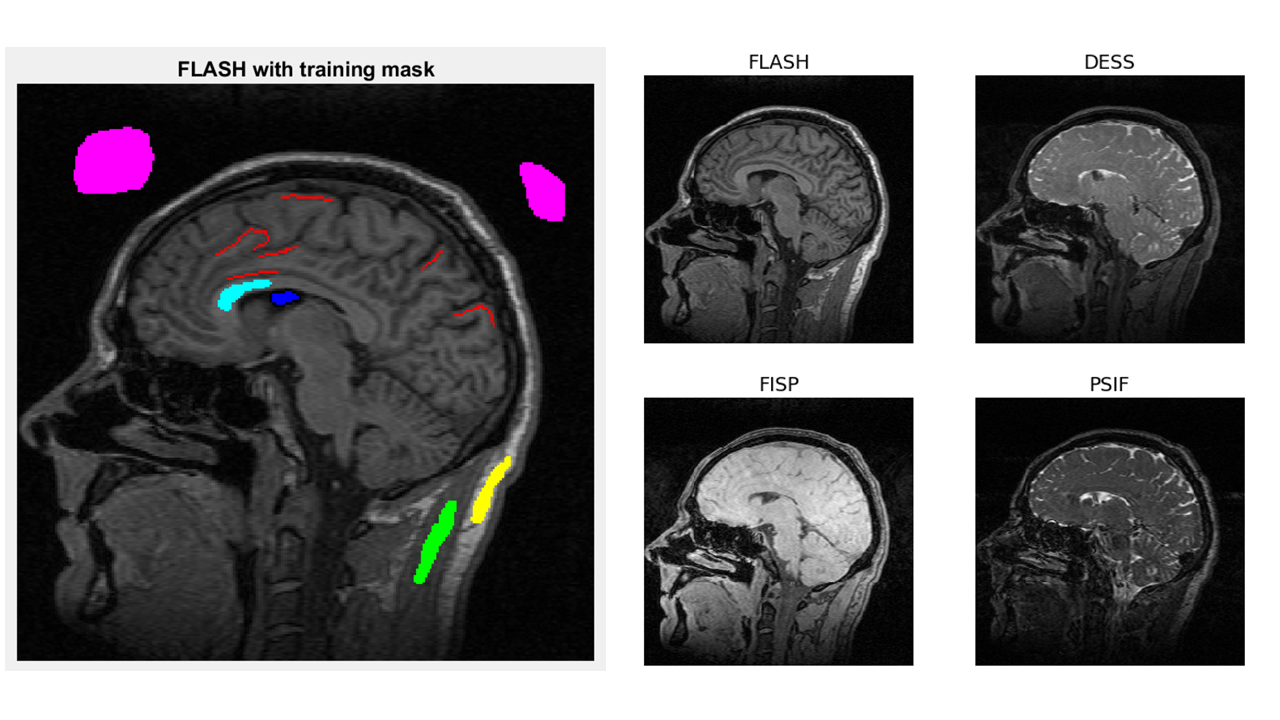

In [17]:
from IPython.display import Image
Image(filename='./assets/multispectral_tissue_classification_pptx.png', width=600)

**Import libraries to be used**

In [18]:
%matplotlib inline
# This to be able to display figures and graphs within the notebook browser

import os
import os.path as op
import pathlib
import glob
import shutil
import warnings
import numpy as np
import pandas as pd
import nibabel as nib
import scipy
import cv2
from nilearn import image
from nilearn import plotting
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn.image.image import mean_img
#import joblib
from sklearn.cluster import KMeans
from nilearn.masking import apply_mask
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
import IPython

home = os.path.expanduser('~')  # To make path to local home directory

C:\Users\arvid\Anaconda3\envs\Seili\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



**Define directory with the data and the channel names (MRI pulse sequence acronyms)**

In [19]:
mydata = '../testdata'
chn_names = ['FLASH', 'DESS', 'FISP', 'PSIF']

## Read the multispectral MR image and the binary ROI mask

In [20]:
# Using nibabel to read the multispectral image (and the ROI mask)
fn_multispectral = '../data/BRAIN-MRI/multispectral_mri.nii.gz'
img = nib.load(fn_multispectral)
fn_roimsk = '../data/BRAIN-MRI/brain_roi_mask.nii.gz'
roimsk = nib.load(fn_roimsk)

**Print properties of the multispectral NIFTI image**

In [21]:
print('**Multispectral image info:**')
print('shape of image = ', img.header.get_data_shape())
print('units = ', img.header.get_xyzt_units())
print('voxel size = ', img.header.get_zooms())
print('dtype = %s' % img.header.get_data_dtype())
data = img.get_data()
print('min = %.1f' % data.min())
print('max = %.1f' % data.max())
print('number of channels =', img.shape[-1])
# Collaps the singular (z-)dimension
img_data = np.uint16(data.squeeze())
print('shape of 2D+spectral img_data = ',img_data.shape)
print('dtype of 2D+spectral img_data = ',img_data.dtype)
print('img affine:', img.affine)

**Multispectral image info:**
shape of image =  (256, 256, 1, 4)
units =  ('unknown', 'unknown')
voxel size =  (1.0, 1.0, 1.4, 1.0)
dtype = float64
min = 0.0
max = 493.0
number of channels = 4
shape of 2D+spectral img_data =  (256, 256, 4)
dtype of 2D+spectral img_data =  uint16
img affine: [[   0.            0.            1.39999998    0.        ]
 [   1.            0.           -0.          256.        ]
 [   0.            1.            0.         -511.        ]
 [   0.            0.            0.            1.        ]]


**and the ROI mask**

In [22]:
print('**Brain ROI mask info:**')
print('shape = ', roimsk.header.get_data_shape())
print('voxel size = ', roimsk.header.get_zooms())
print('dtype roimsk = %s' % roimsk.header.get_data_dtype())
roimsk_data = roimsk.get_data().squeeze()
print('min mask value = %.0f' % roimsk_data .min())
print('max mask value = %.0f' % roimsk_data .max())
print('shape of 2D roimsk_data = ', roimsk_data.shape)
print('roimsk affine:', roimsk.affine)

**Brain ROI mask info:**
shape =  (256, 256, 1, 1)
voxel size =  (1.0, 1.0, 1.4, 1.0)
dtype roimsk = int16
min mask value = 0
max mask value = 1
shape of 2D roimsk_data =  (256, 256)
roimsk affine: [[   0.            0.            1.39999998    0.        ]
 [   1.            0.           -0.          256.        ]
 [   0.            1.            0.         -511.        ]
 [   0.            0.            0.            1.        ]]


**Display the multispectral MR image**

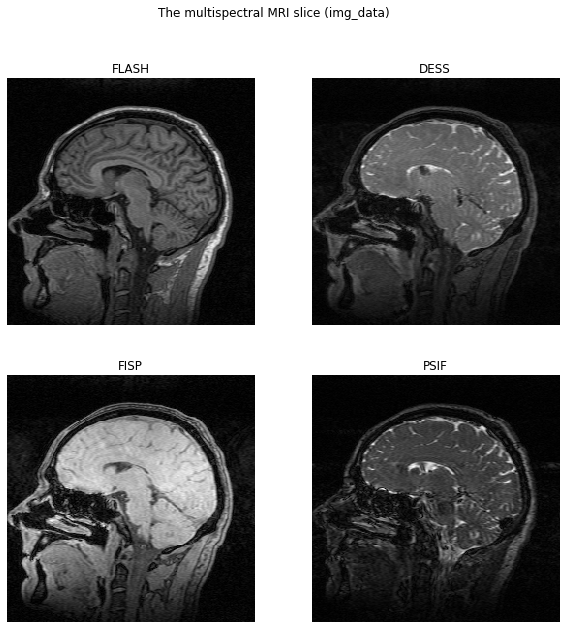

In [23]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
ax = axes.ravel()
for k, ch in enumerate(chn_names):
    ax[k].imshow(img_data[:, :, k].T, cmap='gray', origin='lower')
    ax[k].set_title(ch)
    ax[k].set(xlabel="")
    ax[k].axis('off')
plt.suptitle("The multispectral MRI slice (img_data)") 
plt.tight_layout
plt.show()

### Constructing a Pandas data frame from the MRI data (img) and the ROI mask (roimsk)

In [24]:
roimsk_data = roimsk.get_data().squeeze()
# roimsk_data = np.ones(roimsk_data.shape)   # Using the whole image as ROI
roimsk_data.shape

(256, 256)

Find all pixel locations in the ROI for extracting a dataset X and corresponding pixel locations to a Pandas data frame (dfR)

In [25]:
# Find pixel locations (ind_roi) corresponding to brain ROI (value 1 inside ROI, 0 else) 
ind_roi = np.where(roimsk_data == 1) 
X = np.asarray(img_data[ind_roi[0][:],ind_roi[1][:],:]) # The multispectral signal intensities
dfR = pd.DataFrame(X, columns = chn_names)
dfR.insert(loc = len(dfR.columns),
           column = 'row',
           value = ind_roi[0])  # Row of pixel location
dfR.insert(loc = len(dfR.columns),
           column = 'col',
           value = ind_roi[1])  # Col of pixel location

In [26]:
X.shape

(35822, 4)

In [27]:
dfR.head()

FLASH  DESS  FISP  PSIF  row  col
0    149    66    67    66   20  121
1    129    90    86   106   20  122
2    101    83   146    81   20  123
3     28    79   158    40   20  124
4      7    53   155    67   20  125

In [28]:
dfR.tail()

FLASH  DESS  FISP  PSIF  row  col
35817     10    13    29     6  239  150
35818      8    18    29     6  239  151
35819     12    18    20     8  239  152
35820      0    20    25    16  239  153
35821      9    26    19    19  239  154

### OPTIONAL: Scaling* of feature vectors  (MRI signal inensity), channel-by-channel wthin the ROI mask

*) Scaling to zero mean and unit standard deviation

In [29]:
scaler = StandardScaler()  
scaler.fit(X.astype(float))

X_scaled = scaler.transform(X.astype(float))  

# Make data frame from scaled X_train og y_train to check scaling
dX_scaled = pd.DataFrame(X_scaled, columns=chn_names)
dy = pd.concat([dfR.row, dfR.col], axis=1)
X_scaled = pd.concat([dX_scaled, dy], axis=1)
X_scaled.head()

FLASH      DESS      FISP      PSIF  row  col
0  1.107765 -0.118564 -0.557741 -0.343962   20  121
1  0.763861  0.362309 -0.295802  0.257753   20  122
2  0.282395  0.222054  0.531375 -0.118319   20  123
3 -0.972856  0.141909  0.696810 -0.735078   20  124
4 -1.333956 -0.379037  0.655451 -0.328920   20  125

In [30]:
X_scaled.describe(percentiles = [0.5]).round(4).T

count      mean      std      min       50%       max
FLASH  35822.0    0.0000   1.0000  -1.4543    0.1620    4.6844
DESS   35822.0   -0.0000   1.0000  -1.4410   -0.1186    4.5299
FISP   35822.0   -0.0000   1.0000  -1.4814    0.0626    2.0754
PSIF   35822.0    0.0000   1.0000  -1.3368    0.0321    6.0794
row    35822.0  134.5855  56.4481  20.0000  136.0000  239.0000
col    35822.0  142.2969  50.9810  42.0000  142.0000  240.0000

## Unsupervised classification of multispectral MRI using K-means

In [31]:
X.shape  # n x p data matrix, n=samples, p = feature vector dimension

(35822, 4)

> # Start your experiments here:
(Make a copy of the original notebook and name it e.g. `my_brain-mri-unsupervised-classification.ipynb`)

### Clustering the 4D multispectral data within the ROI mask 
####  LATER: _play with different values of `K`, `max_\__iter` and `tol`_

In [32]:
K = 16  # Number of clusters
max_iter = 300 # Max number of iteration
tol = 0.0001 # Tolerance
kmeans_model = KMeans(n_clusters=K, random_state=42, max_iter=max_iter, tol=tol)
print(kmeans_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


In [33]:
# Fit the K-means model to the data
kmeans_fit = kmeans_model.fit(X)

In [34]:
print(kmeans_fit.labels_)
print('First centroid i p-dimensional feature vector space:\n', kmeans_fit.cluster_centers_[0,:])

[13 13  4 ... 14 14 14]
First centroid i p-dimensional feature vector space:
 [144.50298954 117.15994021 196.52889885 120.4200299 ]


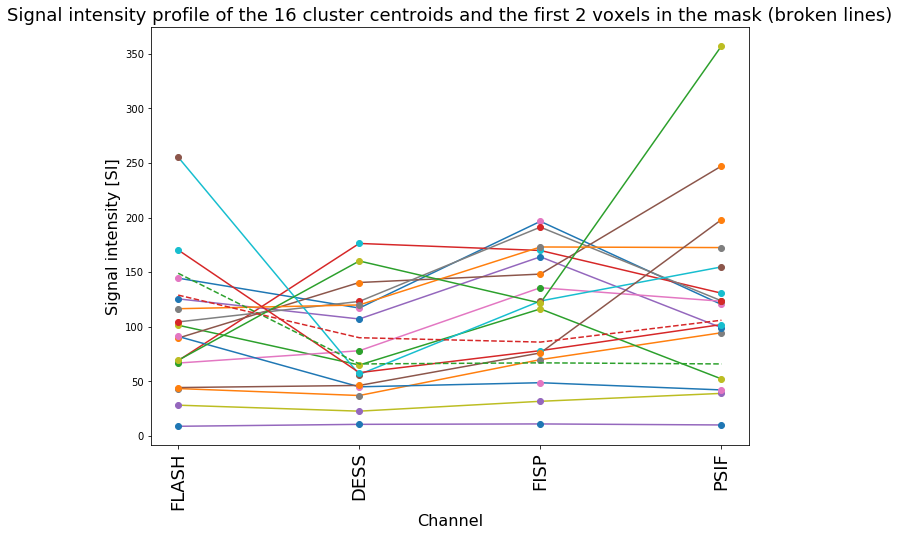

In [35]:
# Plot the cluster centroids as line plots

nv = 2

fig, ax = plt.subplots(1,1)

fig.set_size_inches(10, 7)

plt.plot(kmeans_fit.cluster_centers_.T)
plt.plot(kmeans_fit.cluster_centers_.T, 'o')
plt.plot(X[:nv, :].T, '--')
plt.xlabel('Channel', fontsize=16)
ax.set_xticks([x for x in range(len(chn_names))])
ax.set_xticklabels(chn_names, rotation='vertical', fontsize=18)
plt.ylabel('Signal intensity [SI]', fontsize=16)
#plt.xlim(0, 3)
plt.title('Signal intensity profile of the %d cluster centroids and the first %d voxels in the mask (broken lines)' % (K, nv), fontsize=18)

plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

plt.show()

**OPTIONAL:** Fit the K-means model to the scaled data

In [36]:
# Fit the K-means model to the scaled data
# kmeans_model_scaled = KMeans(n_clusters=K, random_state=42)
# kmeans_fit_scaled = kmeans_model_scaled.fit(X_scaled)

In [37]:
# print(kmeans_fit_scaled.labels_)
# print('First centroid in scaled p-dimensional feature vector space:\n', kmeans_fit_scaled.cluster_centers_[0,:])

#### Make a k-means segmented image (segmentation restricted to the ROI)

In [38]:
kmeans_segm = 0 * roimsk_data.copy()
print('Size of segmented image:', kmeans_segm.shape)
print('min:', kmeans_fit.labels_.min())
print('max:', kmeans_fit.labels_.max())
print('Number of clustered samples within ROI:', len(ind_roi[0]))

Size of segmented image: (256, 256)
min: 0
max: 15
Number of clustered samples within ROI: 35822


#### Assign the cluster belonging to each voxel within the ROI

In [39]:
for v in range(len(ind_roi[0])):
    kmeans_segm[ind_roi[0][v], ind_roi[1][v]] = kmeans_fit.labels_[v]

**and dsiplay the result (comparing with the FLASH channel)**

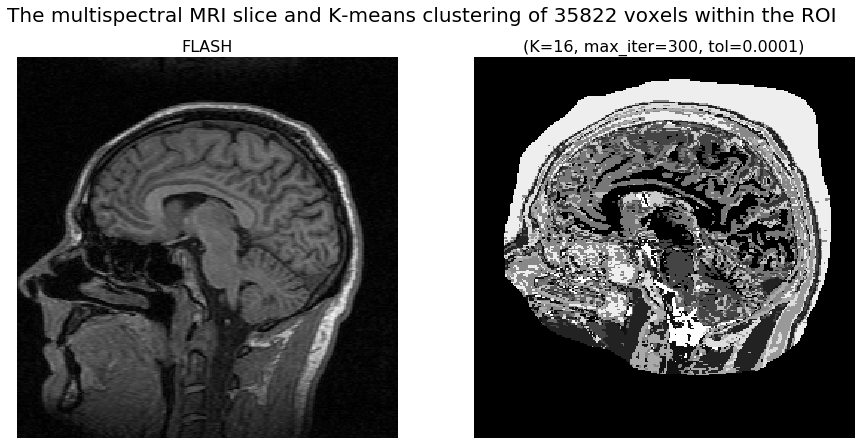

In [40]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
ax = axes.ravel()
ax[0].imshow(img_data[:, :, 0].T, cmap='gray', origin='lower')
ax[0].set_title(chn_names[0], fontsize=16)
ax[0].set(xlabel="")
ax[0].axis('off')
ax[1].imshow(kmeans_segm[:, :].T, cmap='gray', origin='lower')
ax[1].set_title('(K=%d, max_iter=%d, tol=%.4f)' % (K, max_iter, tol), fontsize=16)
ax[1].axis('off')
plt.suptitle('The multispectral MRI slice and K-means clustering of %d voxels within the ROI' % (X.shape[0]), fontsize=20) 
plt.tight_layout
plt.show()

**Design a new [colormap](https://matplotlib.org/tutorials/colors/colormap-manipulation.html) for the clustering, using [named colors](https://matplotlib.org/examples/color/named_colors.html) and gray levels, a colorcode 
[dictionary](https://www.geeksforgeeks.org/python-dictionary)**

In [41]:
import matplotlib
col_code = {
    'CLU0': [255,255,255], # White (background)
    'CLU1': [255,0,255],   # Magenta 
    'CLU2': [255,0,0],     # Red 
    'CLU3': [0,255,255],   # Cyan 
    'CLU4': [0,0,255],     # Blue 
    'CLU5': [0,255,0],     # Green 
    'CLU6': [255,255,0],   # Yellow 
    'CLU7': [10,10,10],    # Gray levels
    'CLU8': [20,20,20],    
    'CLU10': [40,40,40],
    'CLU11': [80,80,80],     
    'CLU12': [120,120,120],     
    'CLU13': [150,150,150],        
    'CLU14': [180,180,180],  
    'CLU15': [200,200,200]  
}
clu_names = list(col_code.keys())
nclu = len(clu_names)
colors = np.array(list(col_code.values()))/255   # scale to interval 0-1
mycmap = matplotlib.colors.ListedColormap(colors)
clu_cmap = matplotlib.cm.get_cmap(mycmap, nclu)   # nclu discrete colors

In [42]:
clu_names_num = []
for i in range(nclu):
    str = clu_names[i] + ' [%d]' % (i)
    clu_names_num.append(str)

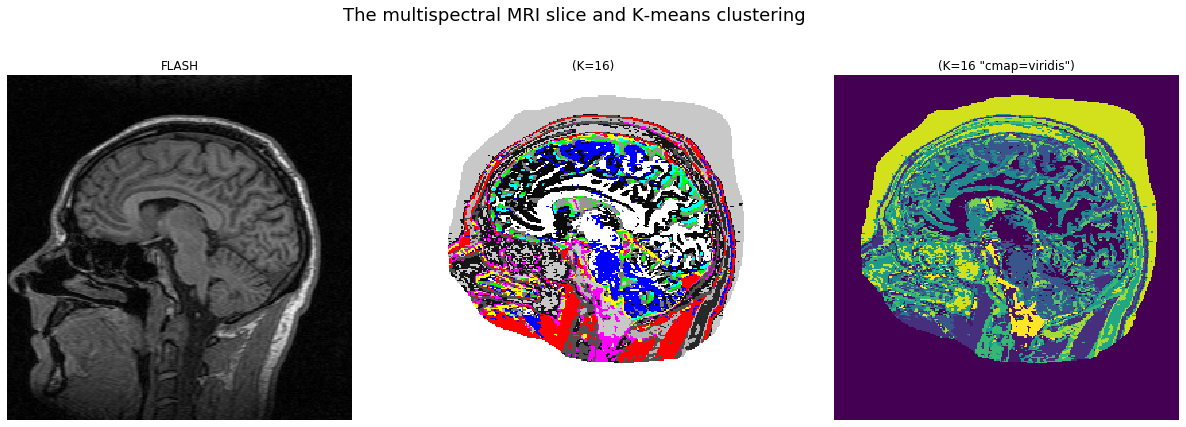

In [43]:
fig, axes = plt.subplots(1,3, figsize=(21,7))
ax = axes.ravel()
ax[0].imshow(img_data[:, :, 0].T, cmap='gray', origin='lower')
ax[0].set_title(chn_names[0])
ax[0].set(xlabel="")
ax[0].axis('off')
ax[1].imshow(kmeans_segm[:, :].T, cmap=clu_cmap, origin='lower')
#ax[1].imshow(kmeans_segm[:, :].T, cmap='viridis', origin='lower')
#cmsk = ax[1].imshow(kmeans_segm[:, :].T, cmap=clu_cmap, origin='lower')
#clim=cmsk.properties()['clim']
#cbar = fig.colorbar(cmsk, shrink=0.4, label='Cluster [0-%d]' % clim[1])
#cbar.ax.set_yticklabels(clu_names_num)
ax[1].set_title('(K=%d)' % (K))
ax[1].axis('off')
ax[2].imshow(kmeans_segm[:, :].T, cmap='viridis', origin='lower')
ax[2].set_title('(K=%d "cmap=viridis")' % (K))
ax[2].axis('off')
plt.suptitle("The multispectral MRI slice and K-means clustering", fontsize=18) 
plt.tight_layout
plt.show()

### 3D scatterplot of clustered (color-coded) featurs vectors and the cluster centroids in 3D feature space

https://stackoverflow.com/questions/38364435/python-matplotlib-make-3d-plot-interactive-in-jupyter-notebook <br>
Using the [magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html) `%matplotlib notebook` instead of `%matplotlib inline`

Text(0.5, 0.92, 'K-means (K=16), n=10000 samples')

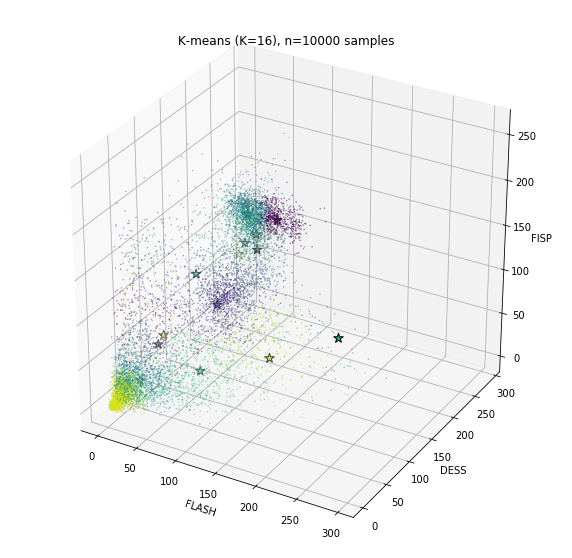

In [44]:
%matplotlib inline
# %matplotlib notebook

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111, projection='3d')

n=10000

xs = X[:n,0]
ys = X[:n,1]
zs = X[:n,2]
c = kmeans_fit.labels_[:n]

ax.scatter(xs, ys, zs, c=c, marker='.', s=0.5)

cxs = kmeans_fit.cluster_centers_[:,0]
cys = kmeans_fit.cluster_centers_[:,1]
czs = kmeans_fit.cluster_centers_[:,2]
cc = range(K)

ax.scatter(cxs, cys, czs, c=cc, marker='*', s=100,  edgecolors = 'black')


ax.set_xlabel('FLASH')
ax.set_ylabel('DESS')
ax.set_zlabel('FISP')

plt.title('K-means (K=%d), n=%d samples' % (K, len(xs)))
#plt.show()  # if using inline

> ### Your turn!
> ## - Play with different values of `K`  (e.g. K=2, ...., 32)
> ## - Try to make biological (or MRI technical) interpretation of the clusters
> ## - Why does the K-means algorithm take longer to converge with increasing K ?
> ## - What does `random_state`do ?
> ## - Play with different values of `max_iter` and `tol` (explain your findings)